#AI FOR BUSINESS

## PROJECT : To Recognize Emotions from Speech Data

### Dataset : RAVDESS

## Step 1 :  Import Necessary Libraries
*   Librosa is the main library we will use


In [2]:
!pip install librosa
!pip install soundfile
!pip install numpy

In [ ]:
!pip install pyaudio

In [4]:
# Common Libraries for File Navigation and Data processing
import os, glob, pickle
import numpy as np
import pandas as pd

In [5]:
# Import Libraries for Speech processing and Plotting functions
import librosa
import soundfile

import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd  # To play sound in the notebook
from matplotlib.pyplot import specgram


In [22]:
# Import Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Step 2 - EDA - Audio or Speech Data Analysis
Analysis sample audio data files

In [7]:
# LOAD IN FILE
x, sr = librosa.load('03-01-01-01-01-01-01.wav')

In [8]:
# https://pysoundfile.readthedocs.io/en/0.8.1/#soundfile.write
import soundfile as sf
sf.write('MaleNeutral.wav', np.random.randn(10, 2), samplerate  = 48000, subtype = 'PCM_24')
Audio(data=x, rate=sr)

# Wave plots
*   Plot a signals amplitude envelope over time
*   Overall shape of an emotion can help determine feature extraction method to us
*   Feature extraction : Converts audio files into a format that can be understood by models.
*   Feature extraction methods : MFCC, STFT, Log-Mel Spectograms, Zero-Crossing Rate, Spectral Centroid etc. to use for modeling.




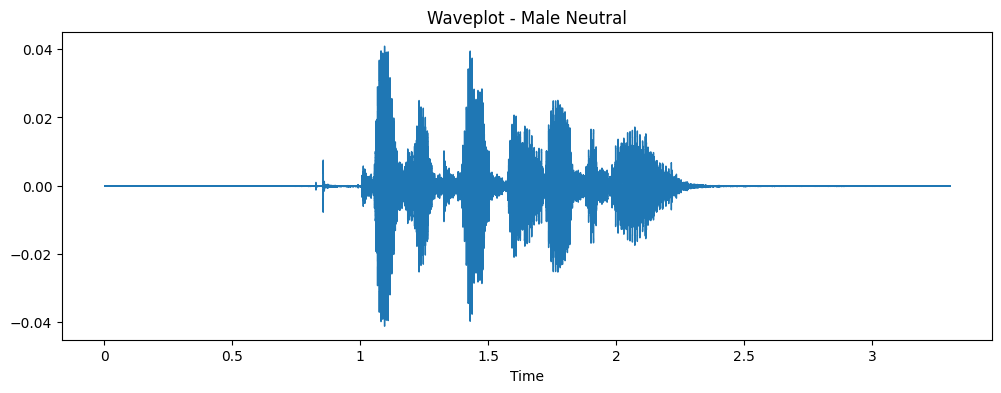

In [10]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr= sr) # Visualize a waveform in the time domain. SR - Sampling Rate
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

## Feature Extraction

## Example Use Log-Mel Spectrograms as the method of feature extraction
*   librosa.display.specshow : To display Log-Mel Spectrograms for sample audio
*   Visit Librosa site for more details https://librosa.org/


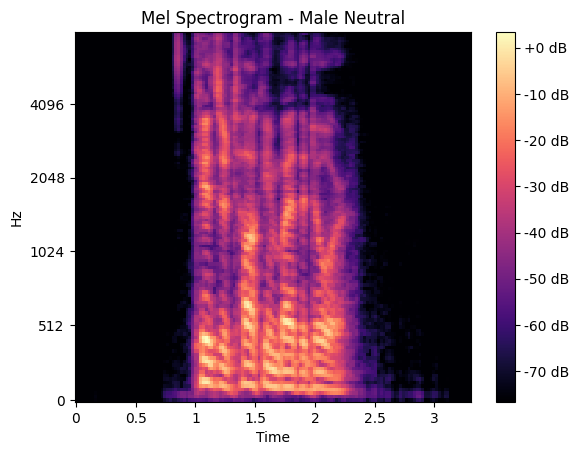

In [12]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)

# Display a spectrogram/chromagram/cqt/etc.
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

In [18]:
def fn_extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [19]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [36]:
!pwd

/content


In [44]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls ./content/gdrive

MessageError: ignored

In [41]:
os.chdir(r"C:/data/ravdess")

FileNotFoundError: ignored

In [35]:
mydir = r"C:\\data\\ravdess\\Actor_*\\*.wav"
for f in glob.glob(mydir + "/*.*"):
    print(f)

file_list = [os.path.basename(f) for f in glob.glob(mydir + "/*.*")]
print(file_list)

[]


In [30]:
import glob

# Set the path to the directory containing the images
audio_dir = '/content/gdrive/My Drive/Colab Notebooks/ravdess/'

# Use glob to get a list of all image files in the directory
audio_files = glob.glob(audio_dir + '*.wav')

print(audio_files)
# Load the first batch of images (e.g. the first 1000 images)
x,y=[],[]
for audio_file in audio_files[:10]:
    file_name=os.path.basename(audio_file)
    print(file_name)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
         continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

[]


In [27]:
filepath = "C:\\data\\ravdess\\Actor_*\\*.wav"
for file in glob.glob(filepath):
    print("file")
    file_name=os.path.basename(file)
    print(file_name)

In [23]:
def fn_load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\data\\SER RAVDESS\\Audio_Speech_Actors_*\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [24]:
x_train,x_test,y_train,y_test=fn_load_data(test_size=0.25)

ValueError: ignored

In [ ]:
print((x_train.shape[0], x_test.shape[0]))

In [ ]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [ ]:
#DataFlair - Train the model
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))